In [1]:
%load_ext autoreload
%autoreload 2
% pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)

import seaborn as sns

sns.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in exp
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in double_scalars
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in double_scalars
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


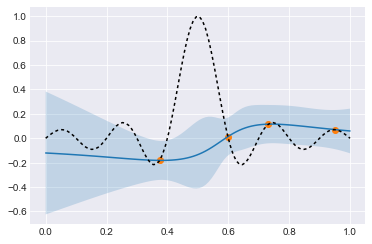

In [2]:
from src.bo import *
from src.dngo import *
from src.acquisition_functions import EI, UCB

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = TFModel(input_dim=1, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

In [3]:
def vectorize(f):
    return lambda X: np.apply_along_axis(f, 1, X)[:, None]

In [4]:
from hpolib.benchmarks.synthetic_functions import Branin

from src.bo import random_grid_samples

f = Branin()
info = f.get_meta_information()
bounds = np.array(info['bounds'])
f = vectorize(f)

In [6]:
# Random sample
samples = random_grid_samples(100, bounds)
values = f(samples)
values[np.argmax(values)]

array([ 202.35113806])

In [40]:
input_dim = bounds.shape[0]
nn = TFModel(input_dim=input_dim, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
acq = EI(model, par=0.01)
# acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=bounds)
bo.run(do_plot=False)

Exception: Error during the conversion of the provided into a ConfigSpace.Configuration object

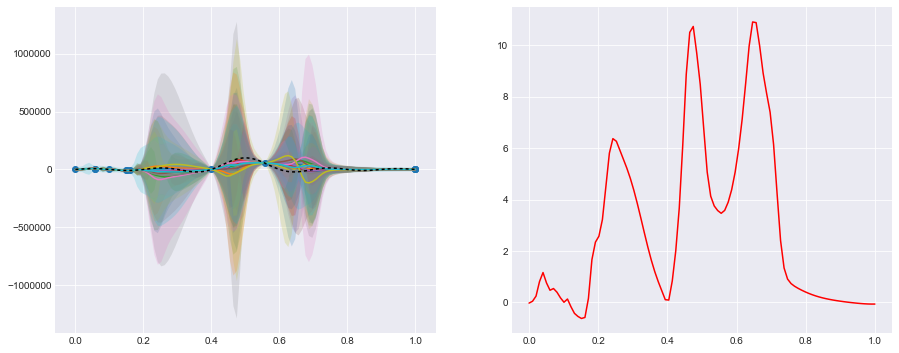

In [15]:
bo.plot_prediction()